In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df
Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the
original csv file.

In [2]:
gdp_df = pd.read_csv("gdppercap.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df = gdp_df.drop(gdp_df.index[-2:])

Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [6]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [7]:
new_columns = {'Country or Area' : 'Country',
               'Year': 'Years',
               'Value': 'GDPPC',}
gdp_df.rename(columns = new_columns, inplace=True)

In [8]:
gdp_df.head()

,Country,Years,GDPPC
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [9]:
gdp_df.tail()

,Country,Years,GDPPC
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6729 non-null   object 
 1   Years    6729 non-null   object 
 2   GDPPC    6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 210.3+ KB


3 columns and 6731 rows. The data for country and years are object. The gdp is a float.

In [11]:
gdp_df['Years'].astype(float)

0       2018.0
1       2017.0
2       2016.0
3       2015.0
4       2014.0
         ...  
6724    1994.0
6725    1993.0
6726    1992.0
6727    1991.0
6728    1990.0
Name: Years, Length: 6729, dtype: float64

Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?

In [12]:
gdp_df['Years'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990'], dtype=object)

In [13]:
gdp_df['Years'].value_counts()

2011    243
2009    241
2012    241
2013    241
2010    241
2014    240
2015    240
2008    240
2016    239
2017    239
2007    239
2006    238
2003    238
2005    238
2002    238
2004    238
2001    237
2000    236
1999    228
1998    227
1997    226
2018    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Years, dtype: int64

How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?

In [14]:
gdp_df['Country'].value_counts()

Philippines                  29
Kyrgyz Republic              29
East Asia & Pacific          29
Dem. Rep. Congo              29
Chile                        29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.


In [15]:
gdp_2014 = gdp_df.groupby("Years").get_group('2014')

Use .describe() to find the summary statistics for GDP per capita in
2014

In [16]:
gdp_2014.head()

,Country,Years,GDPPC
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002324C7D0E50>]],
      dtype=object)

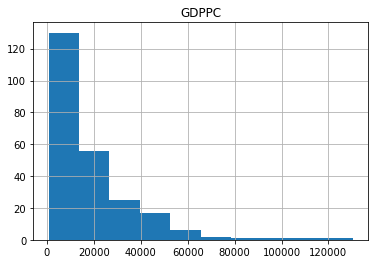

In [17]:
gdp_2014.hist(column='GDPPC', bins=10)

Find the top 5 counties and bottom 5 countries by GDP per capita in
2014.

In [18]:
gdp_2014["GDPPC"].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDPPC, dtype: float64

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.

In [19]:
gdp_1990_2017 = gdp_df.groupby("Years")
#.get_group('1990','2017')

In [20]:
gdp_1990_2017.tail()

,Country,Years,GDPPC
6584,Vietnam,1993,1705.335543
6585,Vietnam,1992,1609.492026
6586,Vietnam,1991,1512.269780
6587,Vietnam,1990,1457.594613
6588,West Bank and Gaza,2018,4576.432497
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


In [21]:
# gdp_pivoted = gdp_df.pivot_table(['Years', 'GDP'], 'Country')
gdp_pivoted = gdp_df.pivot_table(values="GDPPC", index="Country", columns=['Years'])[['1990', '2017']].dropna()

In [22]:
gdp_pivoted

Years,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


Create a new column in gdp_pivoted named Percent_Change. This
column should contain the percent change in GDP_Per_Capita from 1990
to 2017. Hint: Percent change is calculated as 100*(New Value - Old
Value) / Old Value.

In [23]:
gdp_pivoted["gdp_per_capita"] = (gdp_pivoted["2017"] - gdp_pivoted["1990"]) * 100 / gdp_pivoted["1990"]

In [24]:
gdp_pivoted.head()

Years,1990,2017,gdp_per_capita
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


How many countries experienced a negative percent change in GDP per
capita from 1990 to 2017?

In [25]:
gdp_pivoted_sorted = gdp_pivoted.sort_values("gdp_per_capita", ascending=False)

In [26]:
gdp_pivoted_sorted

Years,1990,2017,gdp_per_capita
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


Equatorial Guinea

Which country had the highest % change in GDP per capita? Create a
line plot showing this country’s GDP per capita for all years from 1990
to 2017. Create another showing the country with the second highest %
change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [27]:
#Equatorial Guinea data and china
gdp_df_eg = gdp_df.groupby('Country',).get_group('Equatorial Guinea')
gdp_df_cn = gdp_df.groupby('Country',).get_group('China')

In [28]:
gdp_df_eg.head()

,Country,Years,GDPPC
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


In [29]:
gdp_df_cn.head()

,Country,Years,GDPPC
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099


In [30]:
#china and equatorial from 1990 to 2017
gdp_df_eg_year = gdp_df_eg[(gdp_df_eg["Years"] >= "1990") & (gdp_df_eg["Years"] <= "2017")]
gdp_df_cn_year = gdp_df_cn[(gdp_df_cn["Years"] >= "1990") & (gdp_df_cn["Years"] <= "2017")]

In [31]:
gdp_df_eg_year.head()

,Country,Years,GDPPC
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748
1696,Equatorial Guinea,2013,32959.108100


In [32]:
gdp_df_cn_year.head()

,Country,Years,GDPPC
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099
1131,China,2013,11919.607104


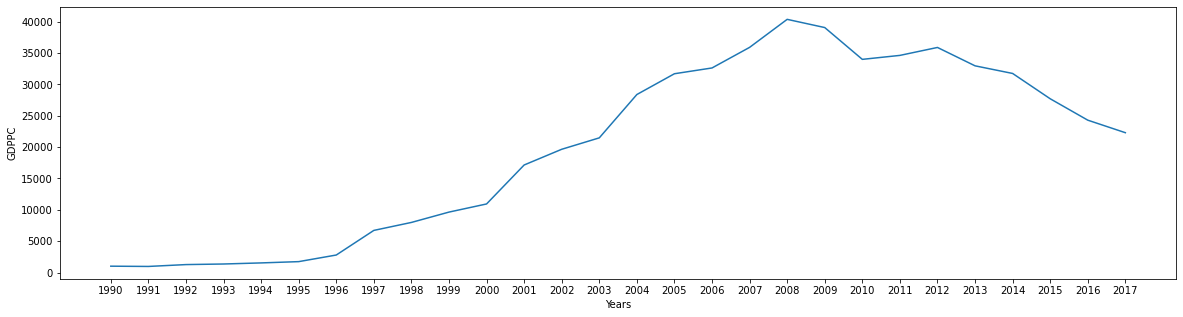

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(data= gdp_df_eg_year,x =gdp_df_eg_year["Years"],y=gdp_df_eg_year["GDPPC"])

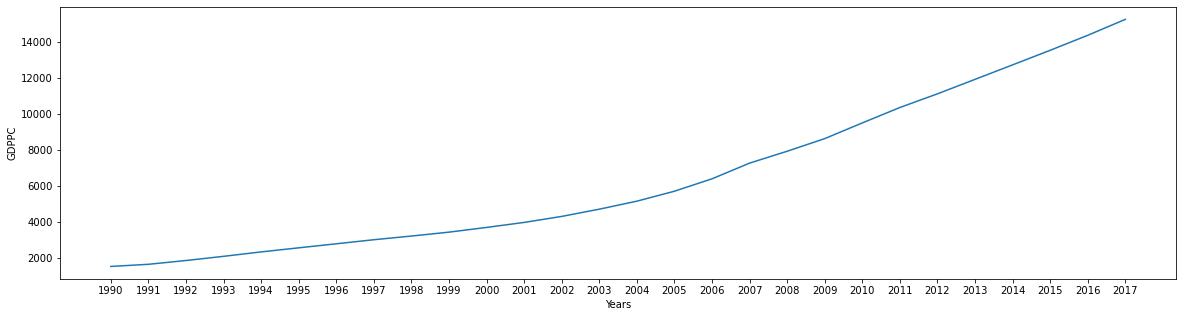

In [34]:
plt.figure(figsize=(20,5))
sns.lineplot(data= gdp_df_cn_year,x =gdp_df_cn_year["Years"],y=gdp_df_cn_year["GDPPC"])

Read in continents.csv contained in the data folder into a new dataframe
called continents. We will be using this dataframe to add a new column
to our dataset.

In [35]:
continents = pd.read_csv("continents.csv")

In [36]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


Merge gdp_df and continents. Keep only the countries that appear in
both data frames. Save the result back to gdp_df.

In [37]:
gdp_df = pd.merge(gdp_df, continents, how='inner', on='Country')

Determine the number of countries per continent. Create a bar chart
showing this

In [38]:
gdp_df['Continent'].value_counts()

Africa           1399
Europe           1243
Asia             1226
North America     739
Oceania           379
South America     348
Name: Continent, dtype: int64

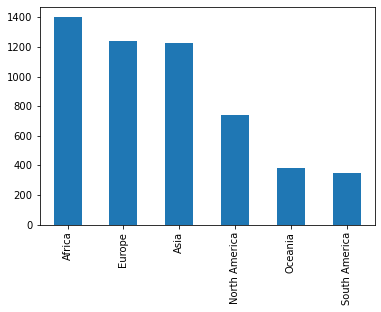

In [39]:
gdp_df['Continent'].value_counts().plot(kind = 'bar')

Creat a seaborn boxplot showing GDP per capita in 2014 split out by
continent. What do you notice?


In [40]:
gdp_df.head()

,Country,Years,GDPPC,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [41]:
gdp_con_2014 = gdp_df[(gdp_df["Years"] == "2014")]

In [42]:
gdp_con_2014.head()

,Country,Years,GDPPC,Continent
4,Afghanistan,2014,1795.735834,Asia
21,Albania,2014,10700.993216,Europe
50,Algeria,2014,13557.769757,Africa
79,Angola,2014,6813.052106,Africa
108,Antigua and Barbuda,2014,20440.540555,North America


In [43]:
gdp_con_2014['Continent'].value_counts()

Africa           49
Europe           45
Asia             44
North America    25
Oceania          14
South America    12
Name: Continent, dtype: int64

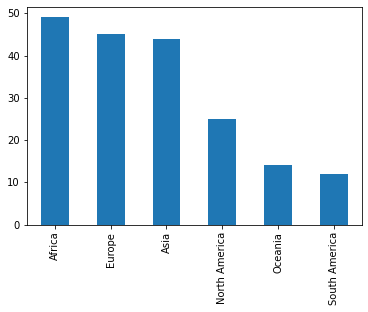

In [44]:
gdp_con_2014['Continent'].value_counts().plot(kind = 'bar')

Read in internet_use.csv into a DataFrame called internet_df. You will
most likely get an error message when doing this - figure out what is going
wrong and fix it. Take a look at the first and last five rows and make any
corrections to your read_csv() call to fix this. Again, do not modify the
original datasets.

In [45]:
internet_df = pd.read_csv("UNInternetusage.csv", error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [46]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [47]:
internet_df = internet_df.drop("Value Footnotes", axis=1)

In [48]:
new_columns_ie = {'Country or Area' : 'Country',
               'Year': 'Years',
               'Value': 'Internet_Users_Pct',}
internet_df.rename(columns = new_columns_ie, inplace=True)

How many rows and columns does this new dataset have? What are the
types of its columns? Ensure that the Internet_Users_Pct column is a
numeric data type and fix it if it is not.

In [49]:
internet_df = internet_df.dropna()

In [50]:
internet_df.shape[0]

4495

In [51]:
internet_df.shape[1]

3

4675 rows and 3 columns

In [52]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Years               4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB


What is the first year that has a nonzero internet users percentage reported?
What is the general trend in internet users percentage over the years. Pick
a visualization that you think illustrates this trend well.

In [53]:
internet_df.isnull().sum()

Country               0
Years                 0
Internet_Users_Pct    0
dtype: int64

In [54]:
internet_df_non = internet_df[(internet_df["Internet_Users_Pct"] == 1) & (internet_df["Internet_Users_Pct"] <= 1.01)]

In [55]:
internet_df_non.sort_values('Years',ascending=True)

,Country,Years,Internet_Users_Pct
4043,Togo,2002,1.0
300,Bangladesh,2006,1.0
768,Central African Rep.,2008,1.0
1965,Iraq,2008,1.0
627,Burundi,2010,1.0
1724,Guinea,2010,1.0


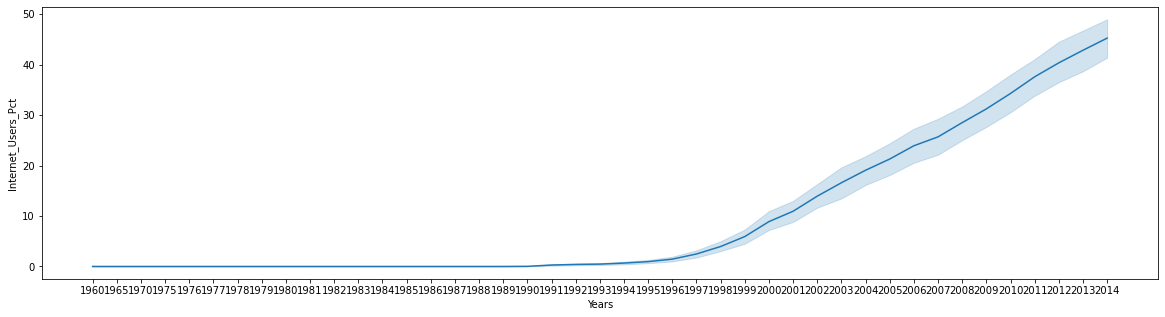

In [56]:
plt.figure(figsize=(20,5))
sns.lineplot(data= internet_df,x =internet_df["Years"],y=internet_df["Internet_Users_Pct"])

Merge gdf_df and internet_df (on Country and Year) into a single
DataFrame named gdp_and_internet_use. Keep only countries and years
that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all
other portions of the data question. Some countries have slightly different
names in the internet use and gdp dataframes. For example, the Central
African Republic is “Central African Republic” in the gdp dataframe and
“Central African Rep.” in the internet use dataframe. Find as many
instances like this as you can and resolve them so that when merging you
keep the maximum number of countries possible.

In [57]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='inner', on=['Country','Years']) 

Look at the first five rows of your new data frame to confirm it merged
correctly. Also, check the last five rows to make sure the data is clean and
as expected.

In [58]:
gdp_and_internet_use.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the
mean internet users percentage in 2014? How many countries have at least
90% internet users in 2014?


In [59]:
# extract 2014 data from gdp_and_internet_use 
gdp_and_internet_use_2014 = gdp_and_internet_use.groupby("Years").get_group('2014')

In [60]:
gdp_and_internet_use_2014.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


Find the countries that had the top 3 largest GDP per capita figures for
2014.Create a seaborn FacetGrid showing the change in internet user
percentage over time for these five countries. Each individual figure in the
facet grid will represent a single country. What trends do you notice?

In [61]:
gdp_and_internet_use_2014.sort_values('GDPPC',ascending=False)

,Country,Years,GDPPC,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30
...,...,...,...,...,...
1765,Liberia,2014,1257.625441,Africa,5.41
2116,Mozambique,2014,1222.452874,Africa,5.94
1856,Malawi,2014,1142.530804,Africa,5.83
2270,Niger,2014,900.136918,Africa,1.95


In [62]:
# collect qatar luxembourg and singapore data from gdp and interenet use
gdp_three = gdp_and_internet_use[(gdp_and_internet_use["Country"] == 'Qatar') | (gdp_and_internet_use["Country"] == 'Luxembourg')| (gdp_and_internet_use["Country"] == 'Singapore') ]

In [63]:
gdp_three.tail()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
2785,Singapore,1994,43835.783293,Asia,1.185204
2786,Singapore,1993,40714.217145,Asia,0.763278
2787,Singapore,1992,37463.009189,Asia,0.471368
2788,Singapore,1991,36201.887548,Asia,0.161504
2789,Singapore,1990,34911.740001,Asia,0.000000


C:\Users\matth\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


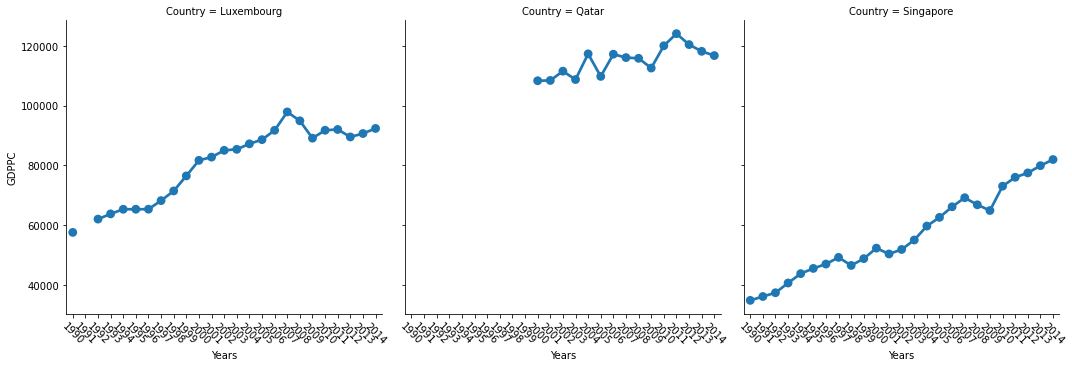

In [64]:
# Factor Plot
g = sns.factorplot(x='Years', 
                   y='GDPPC', 
                   data=gdp_three, 
                   # A recent update in Matplotlib broke how the hue argument works in Seaborn with some plots see: https://github.com/mwaskom/seaborn/issues/1697
                   #hue='quality',  # Color by stage
                   col='Country',  # Separate by stage
                   kind='point') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

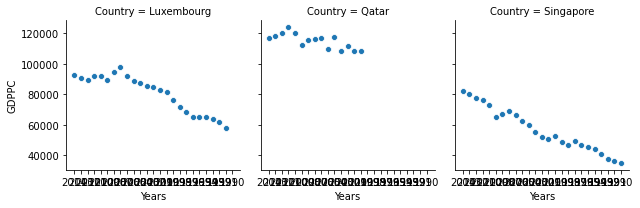

In [65]:
g = sns.FacetGrid(gdp_three, col="Country")
g.map(sns.scatterplot, "Years", "GDPPC")

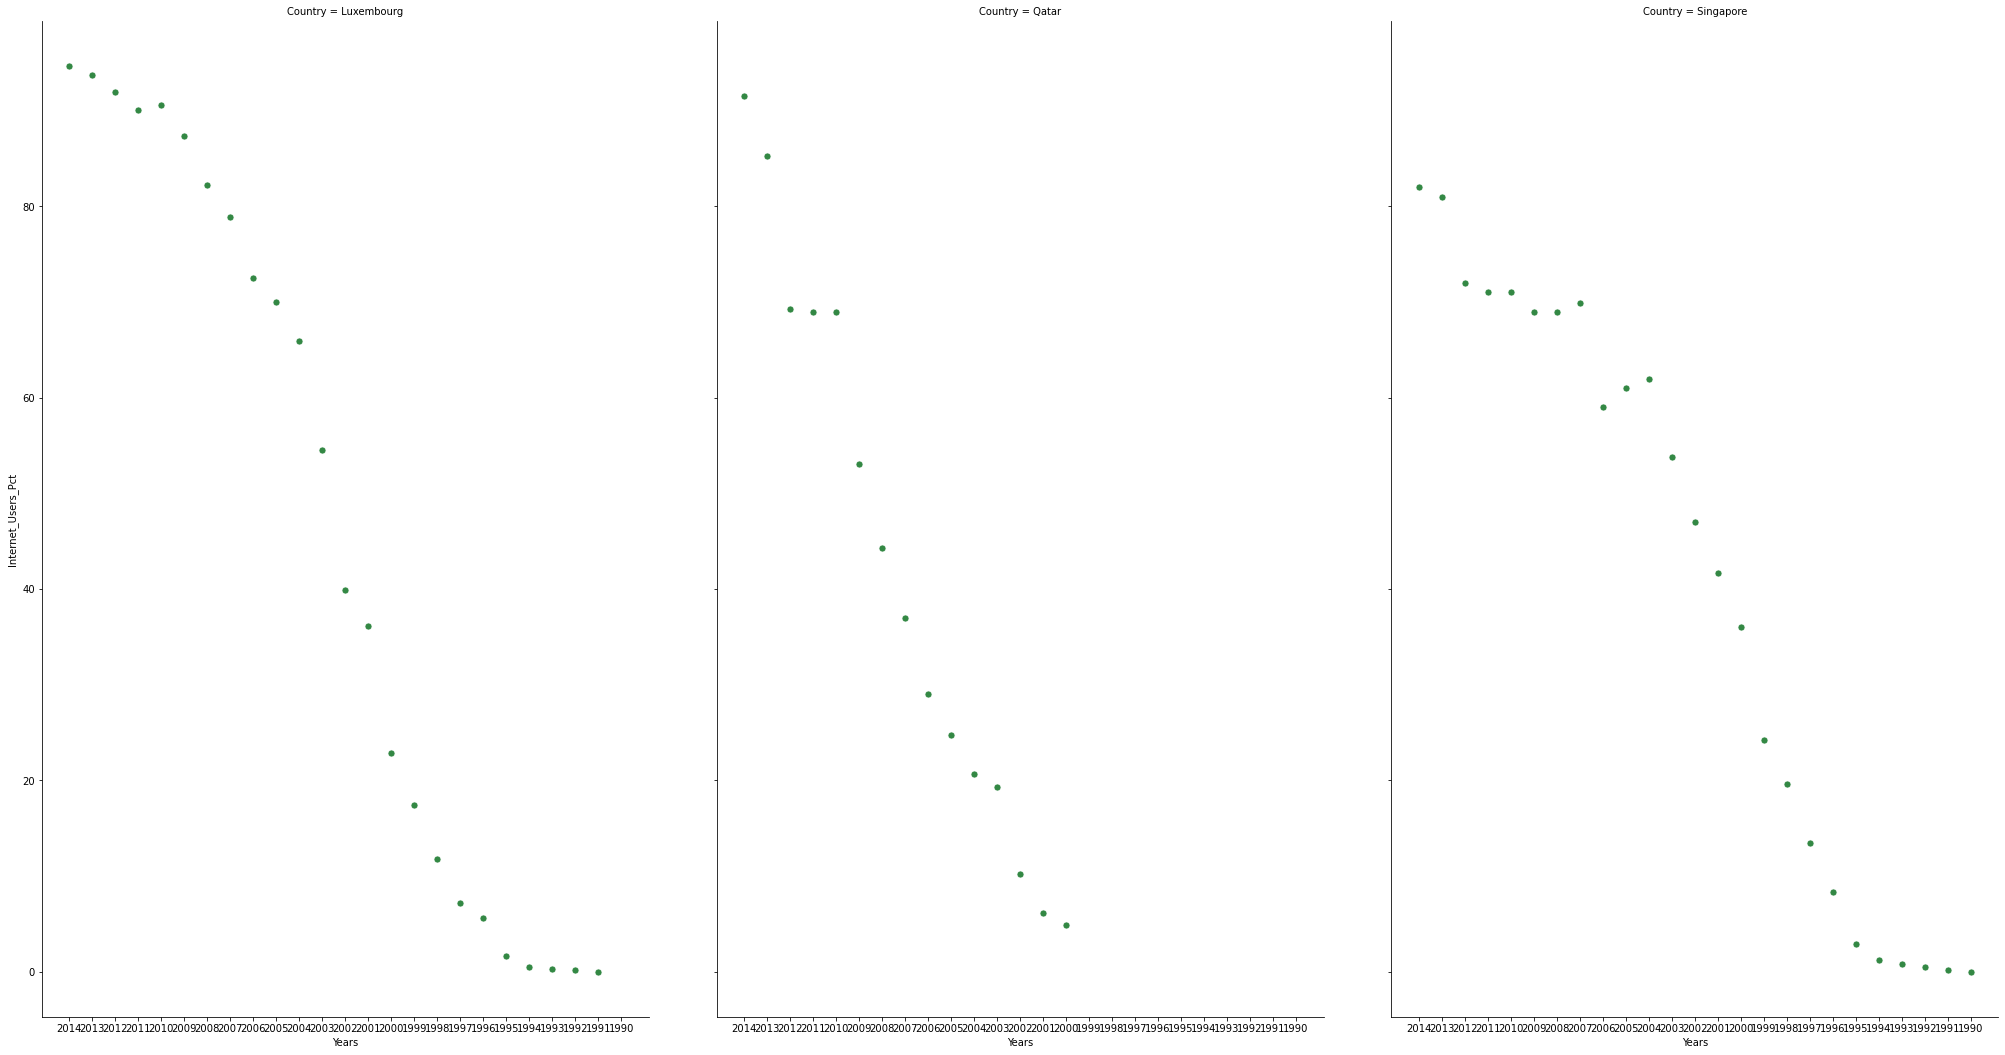

In [66]:
#plt.figure(figsize=(10,15))
g = sns.FacetGrid(gdp_three, col="Country",margin_titles=True)
g.map(sns.scatterplot, "Years", "Internet_Users_Pct", color="#338844", edgecolor="white", s=50, lw=1)
g.fig.set_size_inches(30,20)

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.
What do you notice?

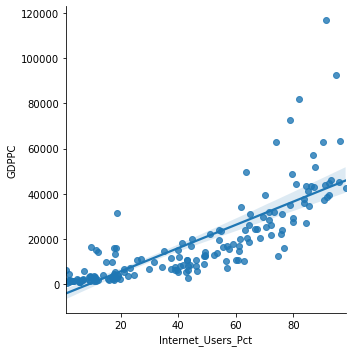

In [67]:
sns.lmplot(x='Internet_Users_Pct', y='GDPPC', data=gdp_and_internet_use_2014);

Find the correlation between GDP per Capita and Internet Use for the
year 2014. What is the meaning of this number?

In [68]:
gdp_and_internet_use_2014[['GDPPC', 'Internet_Users_Pct']].corr()

,GDPPC,Internet_Users_Pct
GDPPC,1.000000,0.787989
Internet_Users_Pct,0.787989,1.000000


Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP
per capita and internet users percentage. How does this compare to the
calculation in the previous part?

In [69]:
type(gdp_and_internet_use_2014)

pandas.core.frame.DataFrame

In [70]:
gdp_and_internet_use_2014["log of GDPPC"] = gdp_and_internet_use_2014['GDPPC'].log()

AttributeError: 'Series' object has no attribute 'log'

In [ ]:
# add column and find logarithm of gdppc then correaltion

In [ ]:
#gdp_and_internet_use_2014 = gdp_and_internet_use_2014.add("correlation_GDPPC_IE", axis=1)

Filter the original dataset down to just the United States for all available
years. Calculate correlation between internet use and gdp per capita. Is
this meaningful or useful?

In [71]:
us_un_df = gdp_and_internet_use[(gdp_and_internet_use["Country"] == 'United States')]
us_un_df.head()

,Country,Years,GDPPC,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000


In [72]:
us_un_df[['GDPPC', 'Internet_Users_Pct']].corr()

,GDPPC,Internet_Users_Pct
GDPPC,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


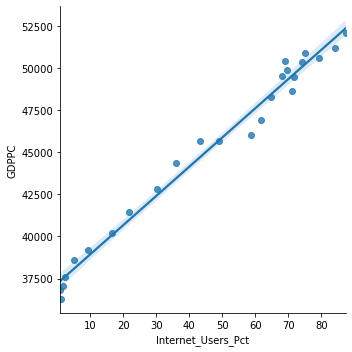

In [73]:
sns.lmplot(x='Internet_Users_Pct', y='GDPPC', data=us_un_df);

# project

 Prepare a short 5 minute presentation of your findings. Report any interesting correlations
you find. Include visualizations and consider adding interactivity with
ipywidgets. This presentation can be done either in a Jupyter Notebook
or using another presentation software, such as PowerPoint.

In [88]:
#import marriage status data
m_status = pd.read_csv("Marital status of men and women.csv")

In [111]:
m_status = m_status.drop(m_status.iloc[:,10:],axis = 1)

In [117]:
#remove last 25 rows
m_status = m_status.drop(m_status.index[-24:])

In [124]:
# remove first 2 rows
m_status = m_status.drop(m_status.index[[0,1,2]])

In [126]:
#rename columns
new_columns = {'United Nations, Department of Economic and Social Affairs' : 'Country',
               'Unnamed: 1': 'ISO',
               'Unnamed: 2': 'Period',
               'Unnamed: 3': 'Years',
               'Unnamed: 4': 'Sex',
               'Unnamed: 5': 'Marital Status',
               'Unnamed: 6': 'Age Groups',
               'Unnamed: 7': '15-19',
               'Unnamed: 8': '20-24',
               'Unnamed: 9': '25-29',
              }
m_status.rename(columns = new_columns, inplace=True)

In [128]:
#remove any missing data
m_status.isnull().sum()

Country              0
ISO                  0
Period               0
Years                0
Sex                  0
Marital Status       0
Age Groups        7189
15-19               74
20-24               34
25-29               64
dtype: int64

In [129]:
#Drop rows with na and reset rows indexes in case any rows were dropped 
m_status = m_status.dropna() 
m_status = m_status.reset_index() # reset's row indexes in case any rows were dropped
m_status.head()

,index,Country,ISO,Period,Years,Sex,Marital Status,Age Groups,15-19,20-24,25-29
0,74,Algeria,12,Around 1970,1966,Men,Single,x,95.3,54.4,14.3
1,75,Algeria,12,Around 1970,1966,Men,Married,x,4.6,44.0,83.3
2,76,Algeria,12,Around 1970,1966,Men,Widowed,x,0.0,0.4,0.8
3,77,Algeria,12,Around 1970,1966,Men,Divorced/Separated,x,0.1,1.2,1.6
4,78,Algeria,12,Around 1970,1966,Women,Single,x,53.5,10.8,3.1


In [ ]:
#Gather data from us,uk

m_status_four = m_status[(m_status["Country"] == 'Qatar') | (gdp_and_internet_use["Country"] == 'Luxembourg')| (gdp_and_internet_use["Country"] == 'Singapore') ]

In [ ]:
#Gather internet use from us, uk, south korea, Japan


In [ ]:
# charts

In [ ]:
#merge internet use and marriage status data

In [ ]:
#create charts for each country

In [ ]:
# Extra Reading